In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import plotly.express as px
import plotly.graph_objects as go
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
df = pd.read_excel('Задача.xlsx')

# EDA 

In [3]:
df.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


Rename the columns and check the head

In [4]:
df.rename(columns={"Возраст, лет":"Возраст", "Стаж вождения, лет":"Стаж вождения", "Убыточность, %":"Убыточность",
                  "Уровень заработной платы, руб/год":"Уровень заработной платы"}, inplace=True)

In [5]:
df.head()

,Персона,Возраст,Стаж вождения,Убыточность,Уровень заработной платы
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


Check for null values and duplicate columns. Run a describe() method to quickly get an overview of the numeric columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Персона                   484 non-null    object
 1   Возраст                   484 non-null    int64 
 2   Стаж вождения             484 non-null    int64 
 3   Убыточность               484 non-null    int64 
 4   Уровень заработной платы  484 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.0+ KB


In [7]:
df.isnull().sum()

Персона                     0
Возраст                     0
Стаж вождения               0
Убыточность                 0
Уровень заработной платы    0
dtype: int64

In [8]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [9]:
df.describe()

,Возраст,Стаж вождения,Убыточность,Уровень заработной платы
count,484.000000,484.000000,484.000000,4.840000e+02
mean,45.320248,21.417355,227.074380,1.017901e+06
std,19.632512,18.037096,171.561271,1.187545e+06
min,20.000000,1.000000,20.000000,1.201850e+05
25%,26.000000,5.000000,103.000000,1.949980e+05
50%,39.500000,15.000000,173.000000,4.410280e+05
75%,65.000000,38.000000,299.250000,1.109668e+06
max,79.000000,58.000000,700.000000,3.982828e+06


<AxesSubplot:>

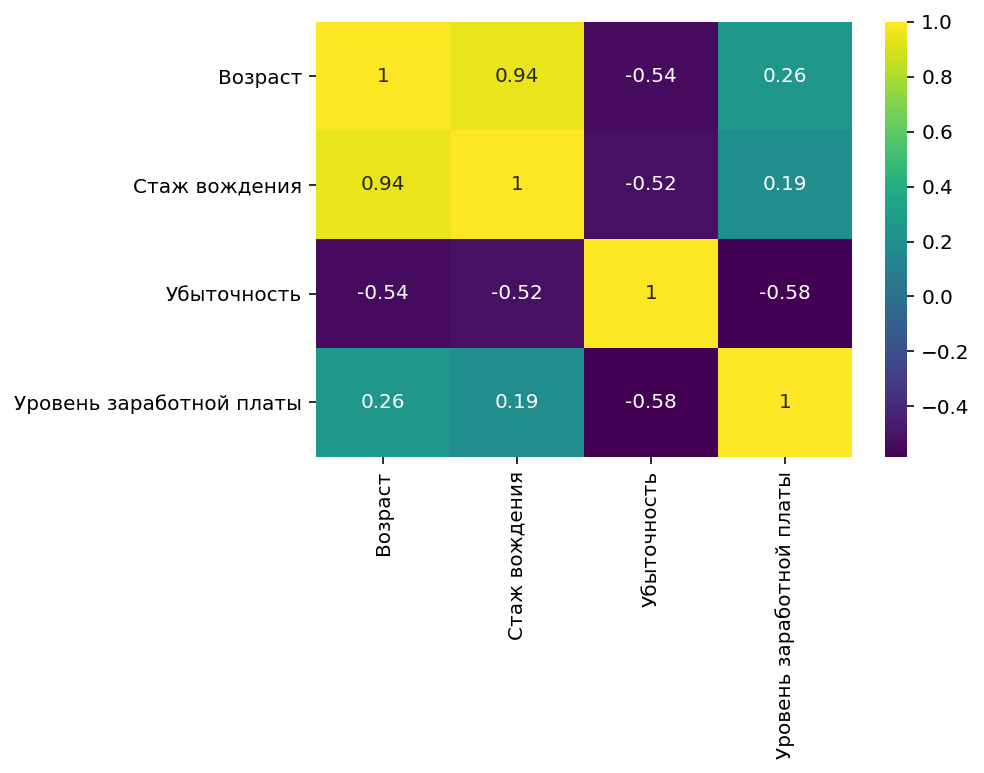

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Seems all three other columns are negatively correlated with the  убыточность column and there is a high positive correlation between the возраст and стаж вождения column which makes sense because most likely as older you become, the more year of driving experience you get.

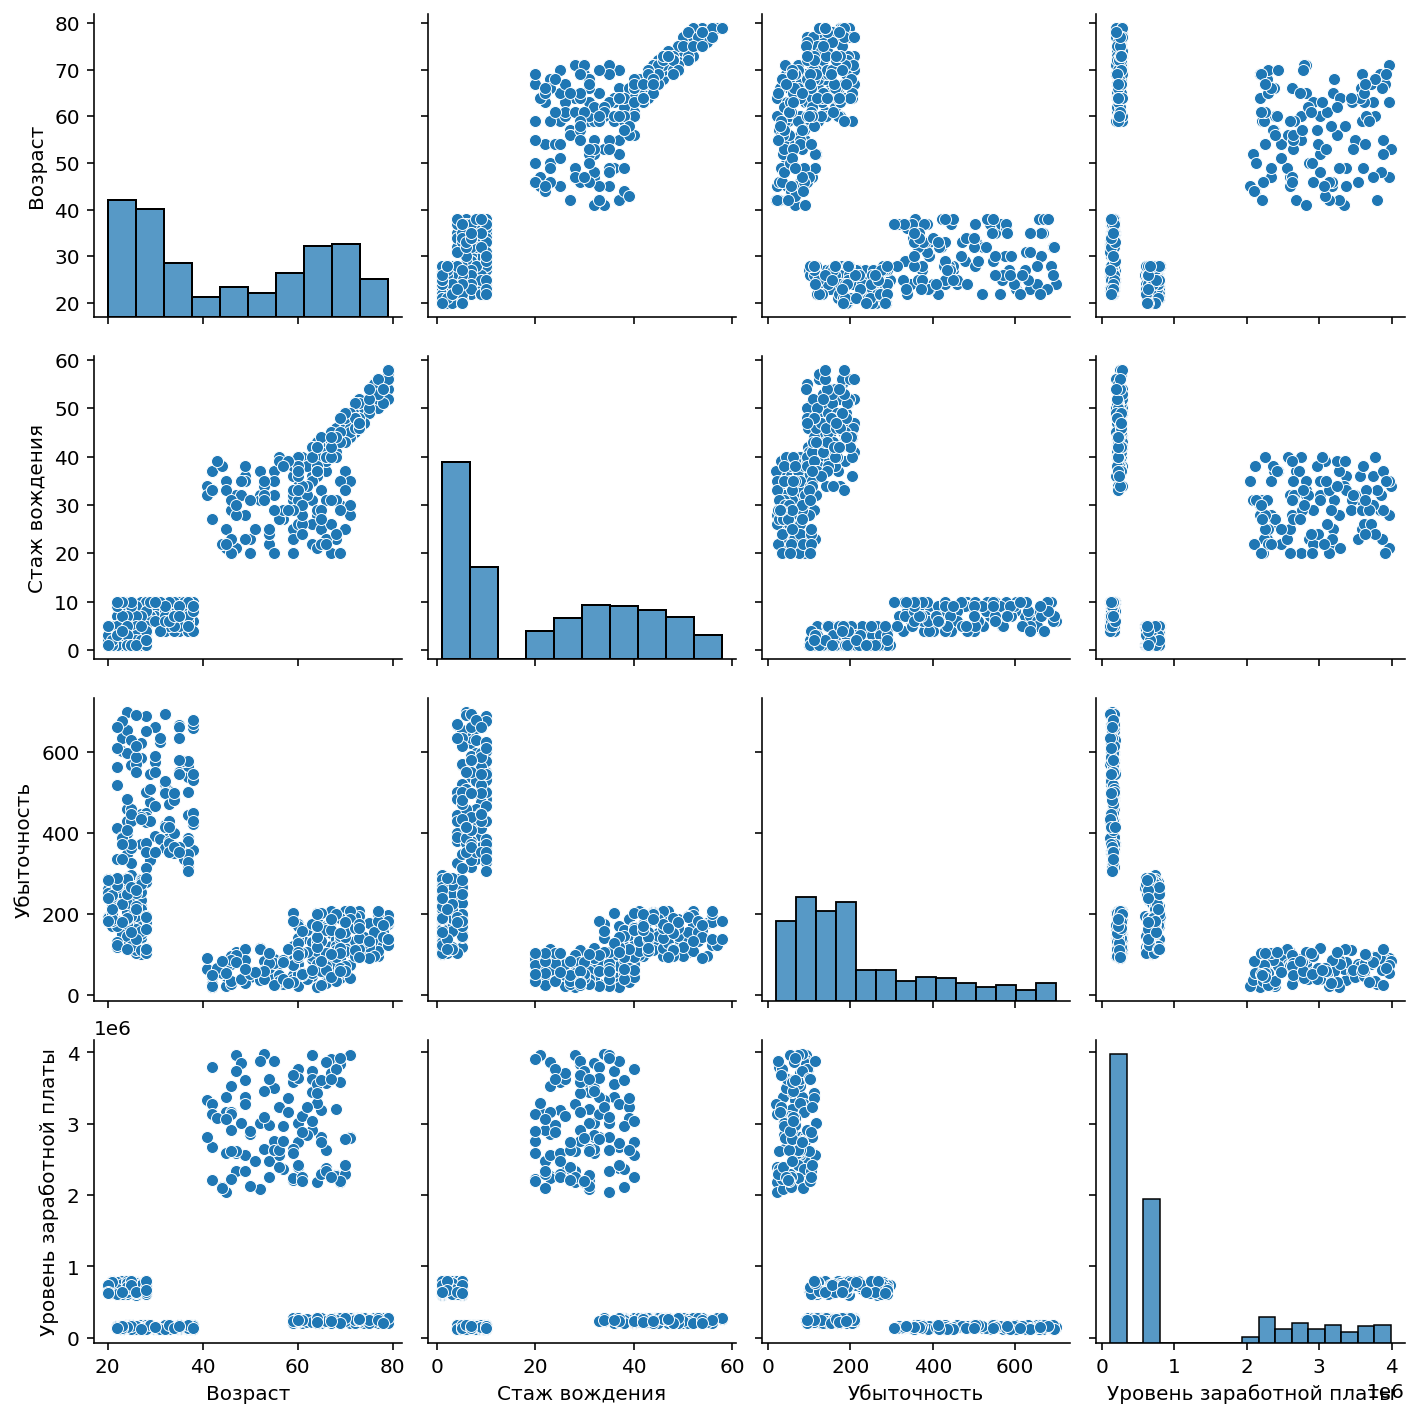

In [11]:
sns.pairplot(df)

Pairplopt showing the relationships between the numeric columns and the distribution on the diagonal

We wil drop the 'Персона' column since it will not be useful for our model

In [12]:
df = df.drop('Персона', axis=1)

# K-Means Clustering

Scale the data since feature scaling is essential for machine learning algorithms that calculate distances between data.

In [13]:
X = df.values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Using the elbow method and kneed to find the optimal number of K (clusters)

Text(0.5, 1.0, 'K-means Finding number of k')

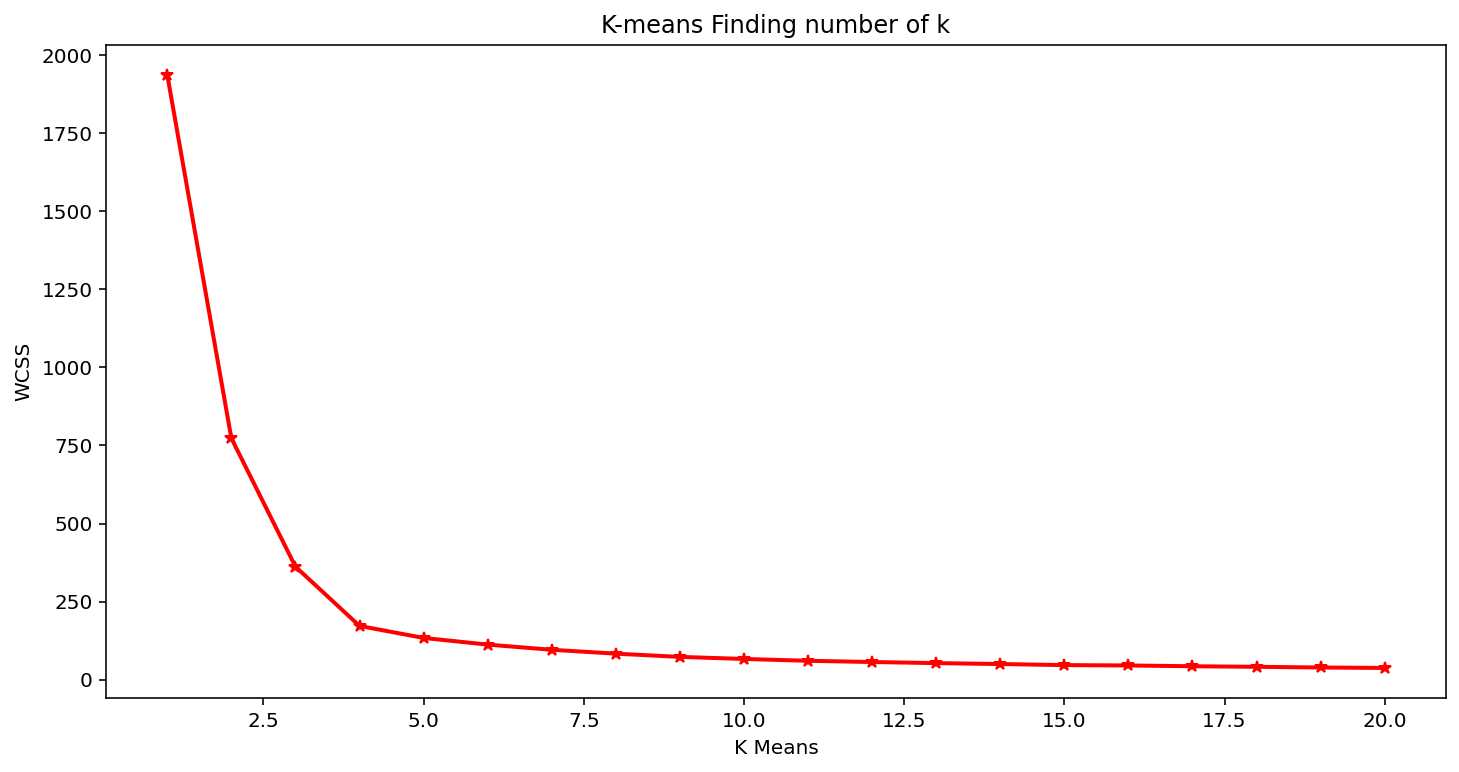

In [14]:
WCSS = [] 
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(scaled_X)
    WCSS.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1,21), WCSS, color='red', marker='*', lw=2.0)
plt.xlabel("K Means")
plt.ylabel("WCSS")
plt.title("K-means Finding number of k")

In [15]:
kl = KneeLocator(range(1, 21), WCSS, curve="convex", direction="decreasing")

kl.elbow

4

Create a Kmeans with 4 clusters and print out the number of points in each cluster

In [16]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(scaled_X)
pred = kmeans.predict(scaled_X)

In [17]:
frame = pd.DataFrame(scaled_X)
frame['Cluster'] = pred
frame['Cluster'].value_counts()

1    128
0    121
2    121
3    114
Name: Cluster, dtype: int64

# K-Means with PCA

Lets appply PCA to our data 

In [18]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df)

In [19]:
pca = PCA()
pca.fit(scaled_feature)

PCA()

In [20]:
pca.explained_variance_ratio_

array([0.64041496, 0.26181602, 0.08451246, 0.01325657])

Selecting the number of components

Text(0, 0.5, 'Cumulative Explained Variance')

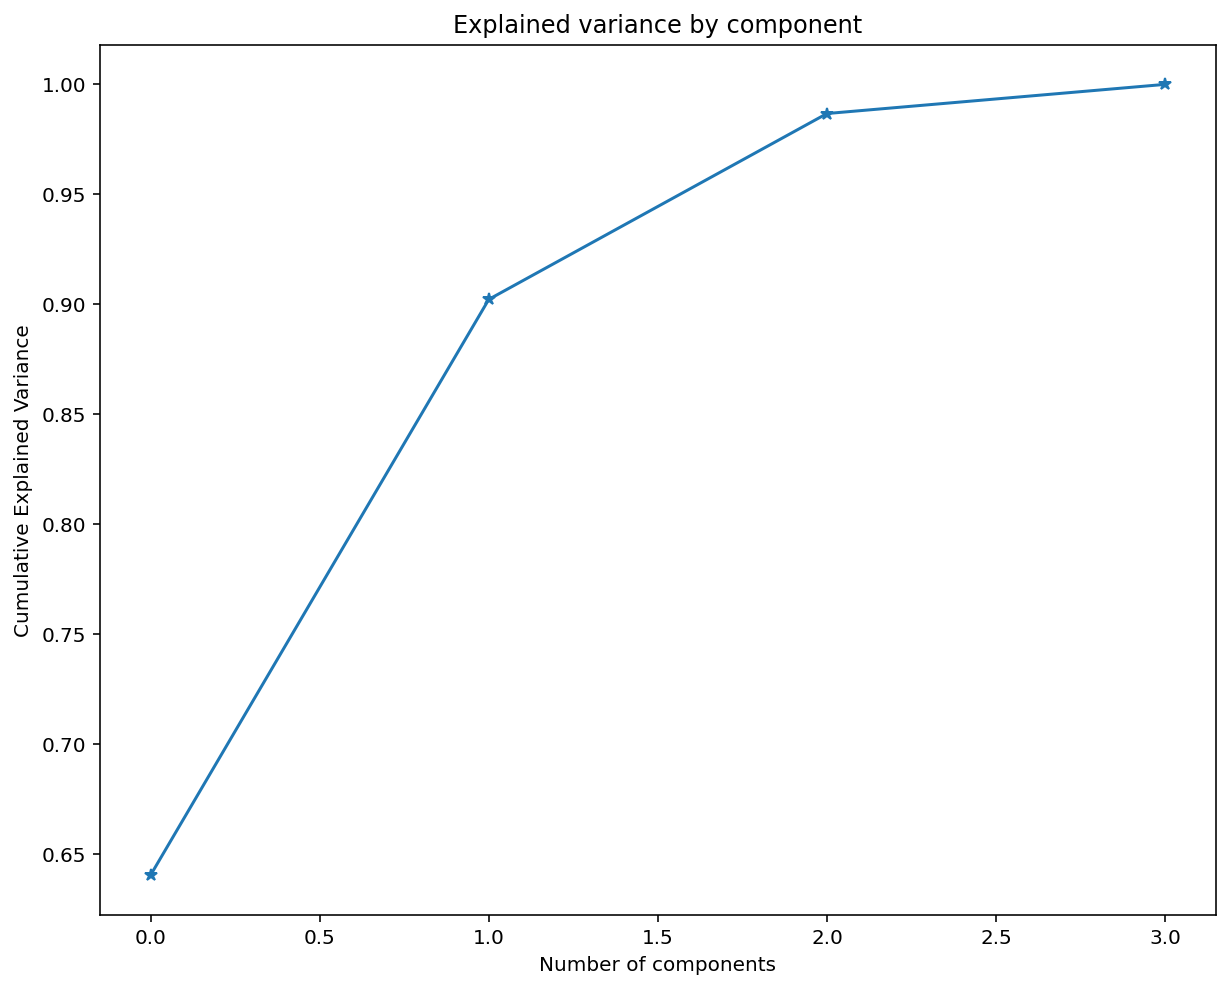

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(pca.n_components_), pca.explained_variance_ratio_.cumsum(), marker='*')
plt.title("Explained variance by component")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

PCA with 2 components 

In [22]:
pca = PCA(n_components=2)

In [23]:
pca.fit(scaled_feature)

PCA(n_components=2)

In [24]:
scaled_pca = pca.transform(scaled_feature)

again using the elbow method and kneed to find the optimal number of K 

Text(0.5, 1.0, 'K-means with PCA clustering')

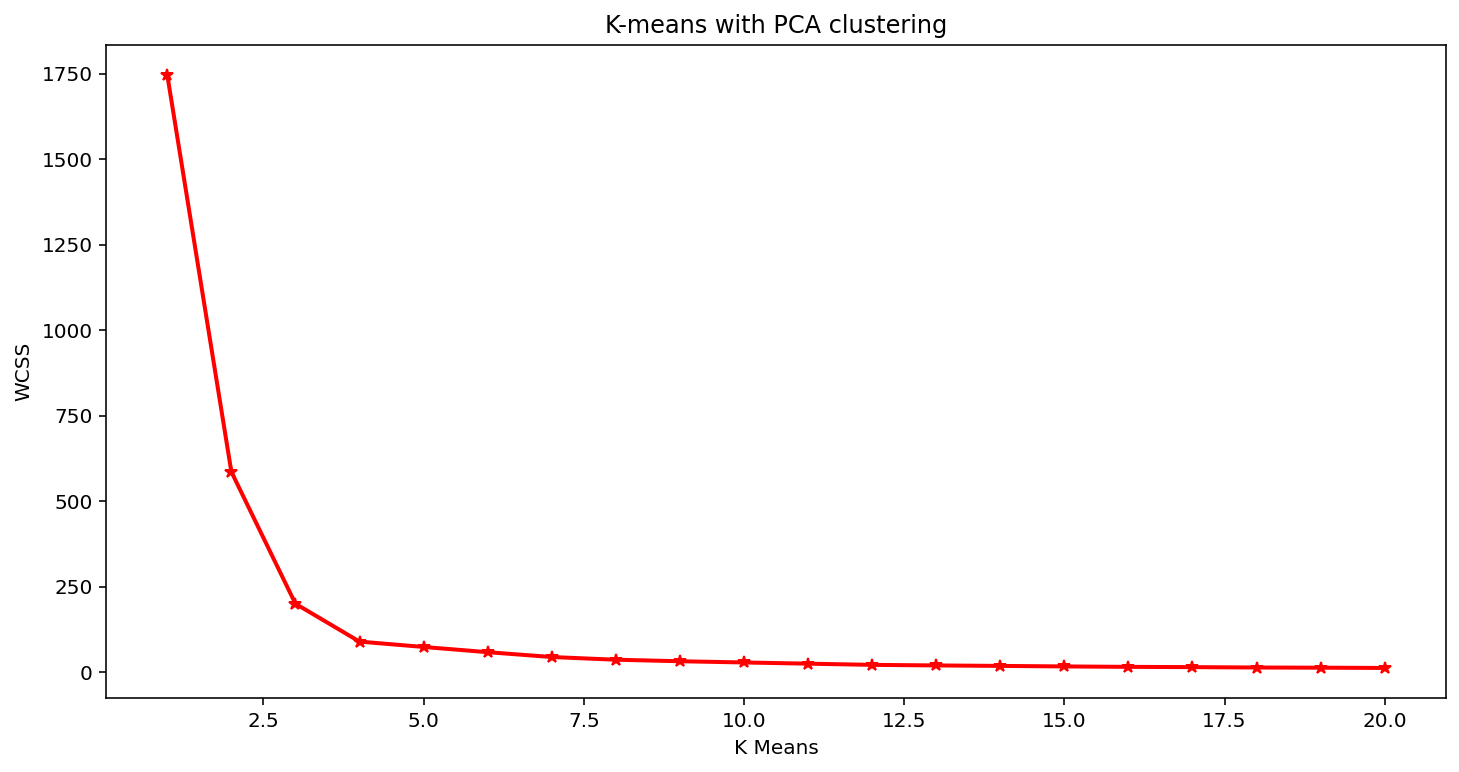

In [25]:
wcss = [] 
K = range(1, 21)

for k in K:
    kmeans_pca = KMeans(n_clusters=k, random_state=100)
    kmeans_pca.fit(scaled_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(12, 6))
plt.plot(K, wcss, color='red', marker='*', lw=2.0)
plt.xlabel("K Means")
plt.ylabel("WCSS")
plt.title("K-means with PCA clustering")

In [26]:
kl = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")

kl.elbow

4

In [27]:
kmeans_pca = KMeans(n_clusters=4, random_state=100)

In [28]:
kmeans_pca.fit(scaled_pca)

KMeans(n_clusters=4, random_state=100)

In [29]:

kmeans_pca.cluster_centers_

array([[-1.44496558, -1.3653831 ],
       [ 1.19712122,  0.68702763],
       [-1.64442295,  1.15212503],
       [ 1.89226731, -0.47376956]])

Concatenate the 2 components and the labels to our original dataframe, also map the labels to their string equivalence 

In [30]:
df_scaled_kmeans_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(scaled_pca)], axis=1)
df_scaled_kmeans_pca.columns.values[-2:] = ['Component 1', 'Component 2']
df_scaled_kmeans_pca['scaled K_Means PCA'] = kmeans_pca.labels_

In [31]:
df_scaled_kmeans_pca.head()

,Возраст,Стаж вождения,Убыточность,Уровень заработной платы,Component 1,Component 2,scaled K_Means PCA
0,20,1,263,716693,1.547578,0.693042,1
1,74,51,107,274393,-1.865832,-1.450097,0
2,27,1,165,723841,1.054679,0.772224,1
3,24,6,348,139419,1.700404,-0.041002,3
4,26,3,286,650003,1.401353,0.442787,1


In [32]:
df_scaled_kmeans_pca['cluster'] = df_scaled_kmeans_pca['scaled K_Means PCA'].map({0:'first',
                                                                               1:'second',
                                                                               2:'third',
                                                                               3:'fourth'})

In [33]:
df_scaled_kmeans_pca.head()

,Возраст,Стаж вождения,Убыточность,Уровень заработной платы,Component 1,Component 2,scaled K_Means PCA,cluster
0,20,1,263,716693,1.547578,0.693042,1,second
1,74,51,107,274393,-1.865832,-1.450097,0,first
2,27,1,165,723841,1.054679,0.772224,1,second
3,24,6,348,139419,1.700404,-0.041002,3,fourth
4,26,3,286,650003,1.401353,0.442787,1,second


Visualise the clusters using seaborn

Text(0.5, 1.0, 'Clusters by PCA Components')

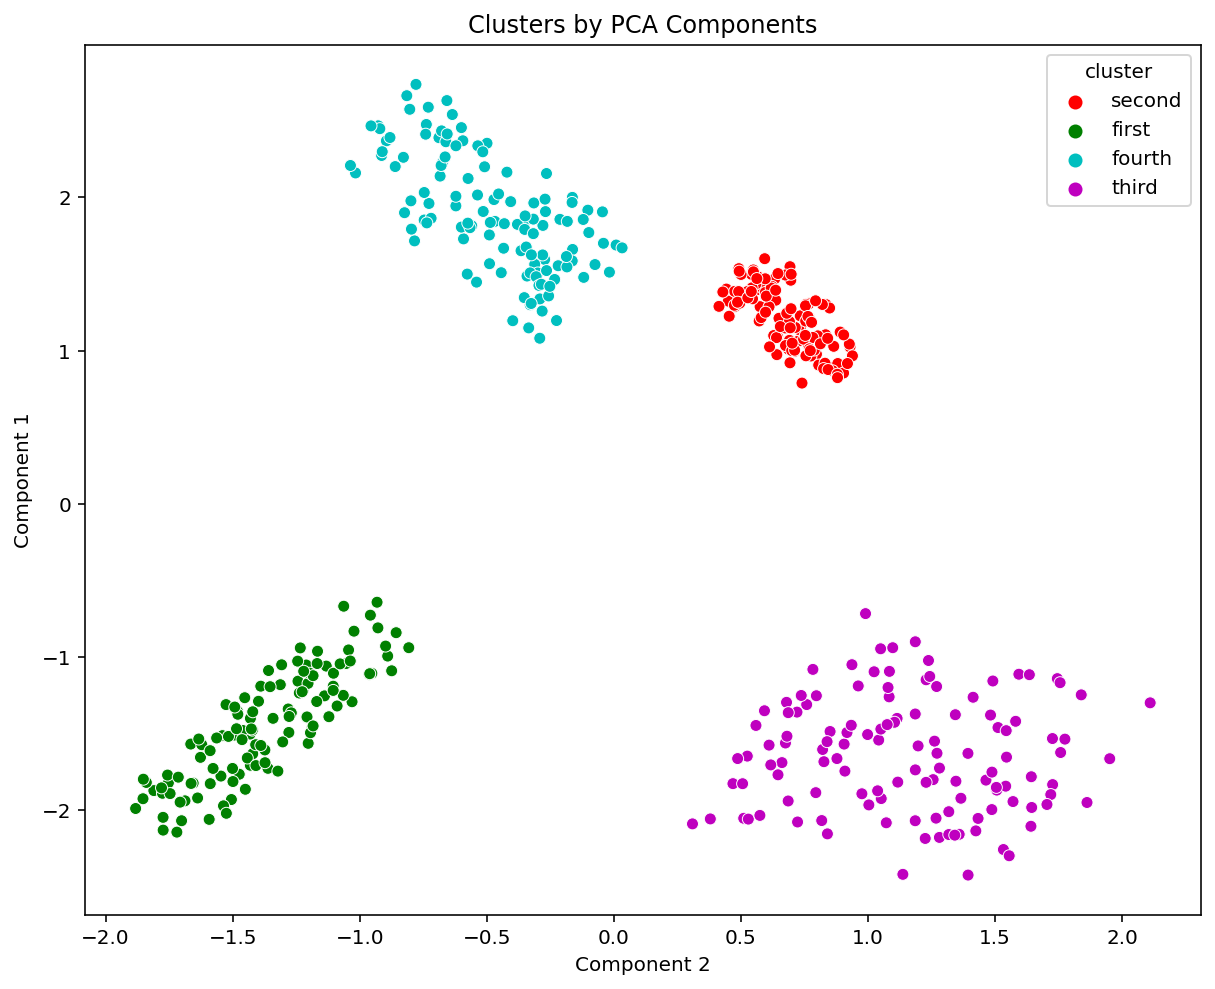

In [34]:
x_axis = df_scaled_kmeans_pca['Component 2']
y_axis = df_scaled_kmeans_pca['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_scaled_kmeans_pca['cluster'], palette=['r', 'g', 'c', 'm'])
plt.title("Clusters by PCA Components")

In [35]:
df_scaled = np.hstack((scaled_X, kmeans.labels_.reshape(-1,1)))

In [36]:
data_scaled_df = pd.DataFrame(data=df_scaled, columns=['Возраст', 'Стаж вождения', 'Убыточность', 'Уровень заработной платы', 'Clusters'])

In [40]:
data_scaled_df['Clusters'] = data_scaled_df['Clusters'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

In [41]:
data_scaled_df.head()

,Возраст,Стаж вождения,Убыточность,Уровень заработной платы,Clusters
0,-1.291044,-1.133136,0.209621,-0.253901,second
1,1.462341,1.641797,-0.700616,-0.626736,first
2,-0.934124,-1.133136,-0.362195,-0.247876,second
3,-1.087090,-0.855643,0.705583,-0.740511,fourth
4,-0.985113,-1.022139,0.343822,-0.310117,second


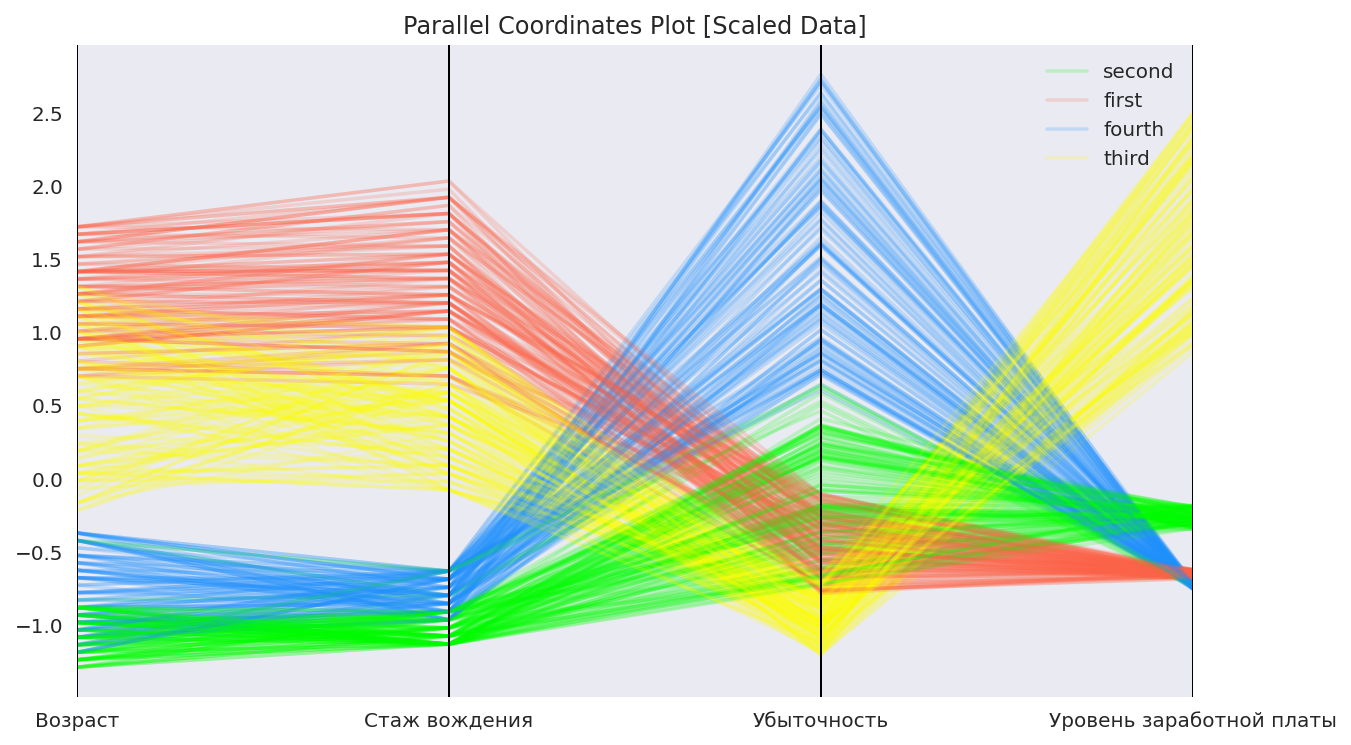

In [42]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(data_scaled_df, "Clusters",
                                     color=["lime", "tomato","dodgerblue", "yellow"],
                                     alpha=0.2)

    plt.title("Parallel Coordinates Plot [Scaled Data]")

Из графика мы можем сделать следующие выводы:
1. Третий кластер - это в основном клиенты с высокой убыточностью и меньшим стажем вождения.
2. Во второй кластер входят клиенты с высокой годовой зарплатой и меньшей убыточностью, но со средним возрастом и стажем вождения.
3. Первый кластер - это клиенты старшего возраста с большим стажем вождения и меньшей убыточностью.
4. И последняя группа - молодые клиенты с меньшим стажем вождения, но с более низкой годовой зарплатой.